Project Assignment #1
In this project assignment, we are going to use the "Traffic Tickets Issued: Four Year Window" data set available from the Data.Gov website (https://catalog.data.gov/dataset?groups=local&organization_type=State+Government#topic=local_navigation).

The focus of the analysis will be oriented towards the following attributes within the cities of :

1) Violation Year

2) Violation Month

3) Violation Day of Week

4) Age at Violation

5) Gender

There are a few objectives you need to accomplish:

1) Examine the above-mentioned attributes in the data set for any missing values - X

2) If there are any missing values, treat the misisng values. Here is a article that provides insight into the common methods to deal with missing values: - X

https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce

Please the tips provided in the article to deal with missing values

3) Compute summary statistics for the "age at violation" for Males and Females respectively - X

a) Mean, b) Median, c) Standard Deviation, d) Variance - X

4) Construct a Boxplot to surface the 25%, 50% and 75% percentiles of "Age at Violation" by Gender

5) Construct Histograms to showcase the following:

a) Count of Violations by Day of Week

b) Count of Violations by Month

c) Count of Violations by Gender

6) Hone in on the data set for the Year 2015. Does the 'Violation at Age' and the 'Total # Of Violations' vary together? Construct a scatter plot that plots the 'Violation at Age' v/s the Total # Of Violation'. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance. Perform this analysis for both the genders.

7) Compute the Correlation Coefficient between the 2 variable i.e. 'Violation at Age' and the 'Total # Of Violations'. Perform this analysis for both the genders.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns


!wget "https://data.ny.gov/api/views/q4hy-kbtf/rows.csv?accessType=DOWNLOAD"

--2018-05-01 20:43:31--  https://data.ny.gov/api/views/q4hy-kbtf/rows.csv?accessType=DOWNLOAD
Resolving data.ny.gov (data.ny.gov)... 52.206.68.26
Connecting to data.ny.gov (data.ny.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD.2’

OAD.2                   [       <=>          ] 116.50M  2.14MB/s               

   rows.csv?accessT     [           <=>      ]   1.45G  2.11MB/s               

rows.csv?accessType     [          <=>       ]   1.45G  2.22MB/s    in 12m 7s  

Last-modified header invalid -- time-stamp ignored.
2018-05-01 20:55:39 (2.04 MB/s) - ‘rows.csv?accessType=DOWNLOAD.2’ saved [1558223985]



In [0]:
tickets = pd.read_csv("rows.csv?accessType=DOWNLOAD")
df = tickets.sample(frac=0.05)
df = df.drop(['Source', 'Police Agency', 'Court'], axis=1)

In [0]:
df.head()

,Violation Charged Code,Violation Description,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License
13699255,37540,INADEQUATE OR NO STOP LAMPS,2014,3,SATURDAY,31.0,M,NEW YORK
13412495,5091,UNLICENSED OPERATOR,2014,9,THURSDAY,31.0,M,NEW YORK
10523079,4021,PLATE MISSING/INSECURE/DIRTY,2013,10,WEDNESDAY,41.0,F,NEW YORK
10981929,306BG,UNINSPECTED GT 60DAY,2014,8,FRIDAY,47.0,M,NEW YORK
8266112,1180D11,SPEED IN ZONE 11-30,2013,6,SATURDAY,50.0,M,NEW YORK


In [0]:
df['Gender'].value_counts()

M    511524
F    195104
C      7122
Name: Gender, dtype: int64

In [0]:
df2 = df.drop(df[df.Gender == "C"].index)

In [0]:
df2['Gender'].value_counts()

M    511542
F    195134
Name: Gender, dtype: int64

In [0]:
df2.describe()

,Violation Year,Violation Month,Age at Violation
count,706628.000000,706628.000000,705849.000000
mean,2014.492938,6.351206,36.825967
std,1.120685,3.367247,13.752450
min,2013.000000,1.000000,16.000000
25%,2013.000000,3.000000,25.000000
50%,2014.000000,6.000000,34.000000
75%,2016.000000,9.000000,47.000000
max,2016.000000,12.000000,95.000000


In [0]:
print(df2.isna().any())

Violation Charged Code    False
Violation Description     False
Violation Year            False
Violation Month           False
Violation Day of Week     False
Age at Violation           True
Gender                    False
State of License           True
dtype: bool


In [0]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
mean_imputer = Imputer(missing_values='NaN', strategy='median', axis=0)

# Train the imputer
mean_imputer = mean_imputer.fit(df2.iloc[:,[5]])

# Apply the imputer to the dataset
imputed_dataset = mean_imputer.transform(df2.iloc[:,[5]])
df2['Age at Violation'] = np.round(imputed_dataset[:,0], decimals=0)

In [0]:
print(df2.isna().any())

Violation Charged Code    False
Violation Description     False
Violation Year            False
Violation Month           False
Violation Day of Week     False
Age at Violation          False
Gender                    False
State of License           True
dtype: bool


In [0]:
from sklearn.preprocessing import LabelEncoder

# Convert binomials and categoricals to encoded labels
for label in ['Gender']:
    df2[label] = LabelEncoder().fit_transform(df2[label])

print(df2.head())

         Violation Charged Code             Violation Description  \
11267567                  1110A          DISOBEYED TRAFFIC DEVICE   
4073242                  3752A1           NO/INADEQUATE HEADLAMPS   
4454255                   1180B                SPEED OVER 55 ZONE   
6500744                    3193  FAILED TO PRODUCE INSURANCE CARD   
3860144                    5091               UNLICENSED OPERATOR   

          Violation Year  Violation Month Violation Day of Week  \
11267567            2014                2               TUESDAY   
4073242             2016               11                FRIDAY   
4454255             2016                5                SUNDAY   
6500744             2016               12                FRIDAY   
3860144             2016                2                FRIDAY   

          Age at Violation  Gender State of License  
11267567              64.0       1         NEW YORK  
4073242               29.0       1         NEW YORK  
4454255             

In [0]:
# men
print(df2[df2['Gender'] == 1].describe())

       Violation Year  Violation Month  Age at Violation    Gender
count   511542.000000    511542.000000     511542.000000  511542.0
mean      2014.489367         6.345086         37.024565       1.0
std          1.120069         3.366014         13.855966       0.0
min       2013.000000         1.000000         16.000000       1.0
25%       2013.000000         3.000000         25.000000       1.0
50%       2014.000000         6.000000         34.000000       1.0
75%       2015.000000         9.000000         47.000000       1.0
max       2016.000000        12.000000         95.000000       1.0


In [0]:
# women
print(df2[df2['Gender'] == 0].describe())

       Violation Year  Violation Month  Age at Violation    Gender
count   195134.000000    195134.000000     195134.000000  195134.0
mean      2014.496074         6.373097         36.334796       0.0
std          1.122079         3.376714         13.535079       0.0
min       2013.000000         1.000000         16.000000       0.0
25%       2013.000000         3.000000         25.000000       0.0
50%       2014.000000         6.000000         34.000000       0.0
75%       2016.000000         9.000000         46.000000       0.0
max       2016.000000        12.000000         95.000000       0.0


In [0]:
print("=====men median=====")
print(df2[df2['Gender'] == 1].median())
print("\n")

print("=====women median=====")
print(df2[df2['Gender'] == 0].median())

=====men median=====
Violation Year      2014.0
Violation Month        6.0
Age at Violation      34.0
Gender                 1.0
dtype: float64


=====women median=====
Violation Year      2014.0
Violation Month        6.0
Age at Violation      34.0
Gender                 0.0
dtype: float64


In [0]:
print("=====men variance=====")
print(np.var(df2[df2['Gender'] == 1]))
print("\n")

print("=====women variance=====")
print(np.var(df2[df2['Gender'] == 0]))

=====men variance=====
Violation Year        1.254551
Violation Month      11.330028
Age at Violation    191.987409
Gender                0.000000
dtype: float64


=====women variance=====
Violation Year        1.259055
Violation Month      11.402139
Age at Violation    183.197433
Gender                0.000000
dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


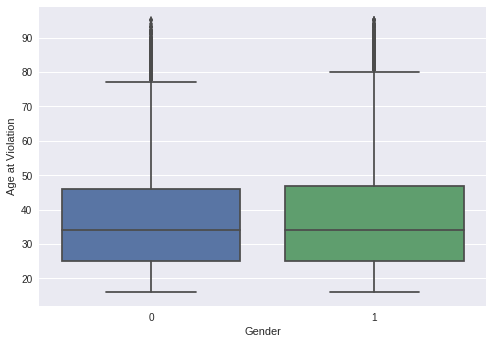

In [0]:
# sns.boxplot(x="Age at Violation", hue="Gender", data=df)
sns.boxplot(x="Gender", y="Age at Violation", data=df2)

In [0]:
# 5) Construct Histograms to showcase the following:
# a) Count of Violations by Day of Week
# b) Count of Violations by Month
# c) Count of Violations by Gender



(array([110953.,  93197.,  98029.,  84666., 107346., 105097., 107388.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

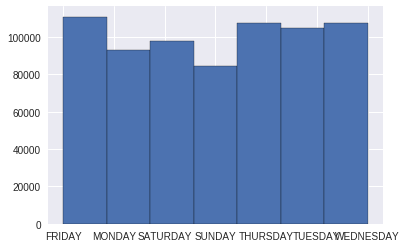

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df2['Violation Day of Week'], bins=7, edgecolor='black')

In [0]:
df2['Violation Day of Week'].value_counts()

0    110422
6    107479
4    107137
5    104977
2     99057
1     92953
3     84603
Name: Violation Day of Week, dtype: int64

(array([114257.,  64154.,  63927.,  66630.,  57904.,  59014.,  60559.,
         58207.,  60120., 101904.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

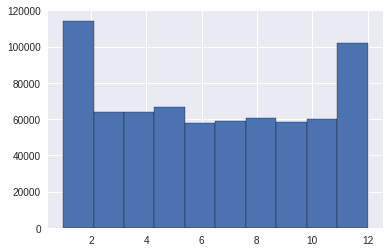

In [0]:
plt.hist(df2['Violation Month'], edgecolor='black')

(array([195134., 511542.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

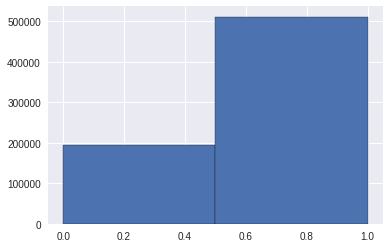

In [0]:
plt.hist(df2['Gender'], bins=2, edgecolor='black')

In [0]:
# 6) Hone in on the data set for the Year 2015. Does the 'Violation at Age' and the 'Total # Of Violations' vary together? 
# Construct a scatter plot that plots the 'Violation at Age' v/s the Total # Of Violation'. 
# Does the Scatter Plot point to a positive covariance? Now, compute the Covariance. Perform this analysis for both the genders.

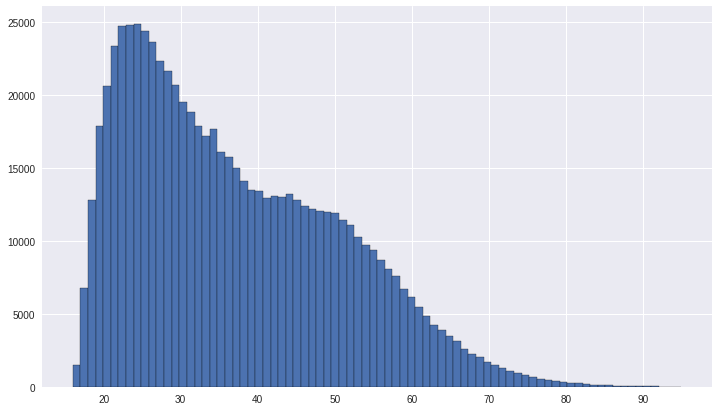

In [0]:
z = df2['Age at Violation']

plt.rcParams['figure.figsize'] = (12,7)
plt.hist(z, bins=80, edgecolor='black');


In [0]:
# 7) Compute the Correlation Coefficient between the 2 variable i.e. 'Violation at Age' and the 'Total # Of Violations'. Perform this analysis for both the genders.

In [0]:
np.corrcoef(df2['Age at Violation'])

1.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706676 entries, 11267567 to 10108412
Data columns (total 8 columns):
Violation Charged Code    706676 non-null object
Violation Description     706676 non-null object
Violation Year            706676 non-null int64
Violation Month           706676 non-null int64
Violation Day of Week     706676 non-null object
Age at Violation          706676 non-null float64
Gender                    706676 non-null int64
State of License          706673 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 68.5+ MB


In [0]:
print(z.value_counts().sort_index().head(50))

16.0     1528
17.0     6737
18.0    12820
19.0    17844
20.0    20589
21.0    23364
22.0    24699
23.0    24810
24.0    24834
25.0    24394
26.0    23651
27.0    22350
28.0    21669
29.0    20708
30.0    19494
31.0    18862
32.0    17887
33.0    17154
34.0    17647
35.0    16084
36.0    15773
37.0    14995
38.0    14137
39.0    13507
40.0    13440
41.0    12956
42.0    13062
43.0    12990
44.0    13203
45.0    12832
46.0    12413
47.0    12157
48.0    12031
49.0    11988
50.0    11886
51.0    11396
52.0    11074
53.0    10295
54.0     9739
55.0     9359
56.0     8694
57.0     8077
58.0     7596
59.0     6713
60.0     6169
61.0     5499
62.0     4855
63.0     4269
64.0     3915
65.0     3457
Name: Age at Violation, dtype: int64
